In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Load and preprocess MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
model = Sequential([
        Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(64 ,3, activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.0339 - val_accuracy: 0.9897
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 16s 18ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0347 - val_accuracy: 0.9899


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Accuracy =", round(test_acc * 100, 4))
print("Loss =", round(test_loss * 100,4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9899
Accuracy = 98.99
Loss = 3.4742


In [15]:
import matplotlib.pyplot as plt

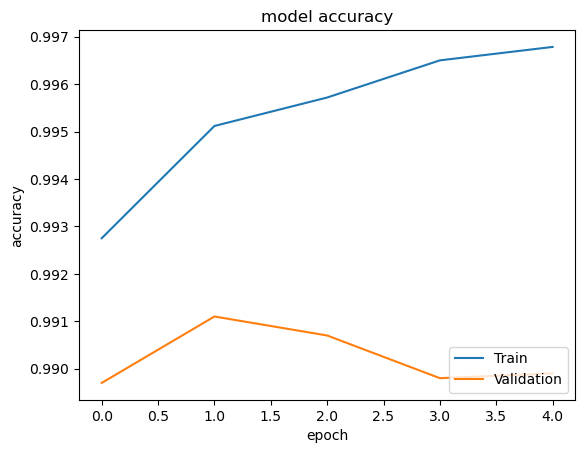

In [16]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

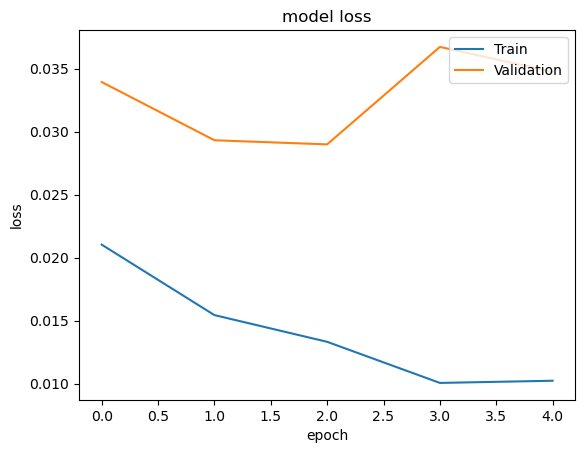

In [17]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
fi